In [1]:
import re
import pickle
import os

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

In [2]:
news_files=os.listdir('news_crawling')

In [4]:
# news brand check
from collections import Counter

counter_news_file=Counter([i.split('_')[0] for i in news_files]).most_common()

In [5]:
news_brands = list(set([i.split("_")[0] for i in news_files]))

In [8]:

pickle_files=[i for i in news_files if i.startswith(news_brands[0])]
pickle_files

['부산일보_20220613.pickle',
 '부산일보_20220906.pickle',
 '부산일보_20220701.pickle',
 '부산일보_20220703.pickle',
 '부산일보_20220903.pickle',
 '부산일보_20221006.pickle',
 '부산일보_20220923.pickle',
 '부산일보_20220728.pickle',
 '부산일보_20220915.pickle',
 '부산일보_20220726.pickle',
 '부산일보_20220909.pickle']

In [9]:
news = list()
for pickle_file in pickle_files:
    with open(f'news_crawling/{pickle_file}', 'rb') as f:
        news.append(pickle.load(f))

In [42]:
_news_str=re.sub(r"[^\uAC00-\uD7A3\s]", "", ''.join(sum(news,[])))

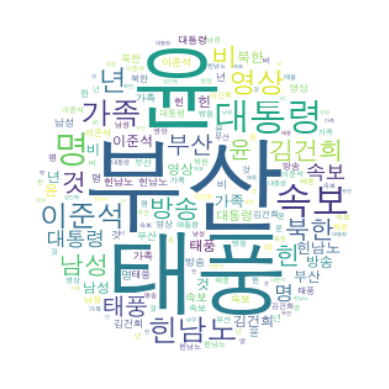

In [50]:
# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = _news_str


okt = Okt()

# okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(20) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
# wc = WordCloud(background_color="white", max_font_size=60,font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")
# cloud = wc.generate_from_frequencies(dict([i for i in tags if i[1]>=3]))
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask,
               font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")
wc.generate_from_frequencies(dict([i for i in tags if i[1]>=3]))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()